# Proyecto
* Karen Fuentes
* Marco Ramirez
* Jenifer Arce

In [495]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
 # Instalación de librerias
import pandas as pd
import numpy as np
import sys
import re, string, unicodedata
import contractions
import inflect
import nltk
from nltk import word_tokenize, sent_tokenize, PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('spanish')
wpt = nltk.WordPunctTokenizer()
ps = PorterStemmer()
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcoramirez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcoramirez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [496]:
def getTrainData():
    # df = pd.read_csv('D57000_complete.csv',
    #                 encoding='utf-8', sep=";")
    df = pd.read_csv('fake_news_spanish.csv',
                    encoding='utf-8', sep=";")
    return df

def getTestData():
    data_test = pd.read_csv(
        'fake_news_test.csv', encoding='utf-8', sep=";")
    return data_test

In [497]:
print('data spanish', getTrainData().shape)
print('data test', getTestData().shape)

data spanish (57063, 5)
data test (1000, 4)


In [498]:
trainData = getTrainData()
trainData.dtypes

ID             object
Label           int64
Titulo         object
Descripcion    object
Fecha          object
dtype: object

In [499]:
trainData.head(10)

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018
5,ID,1,"El PNV consolida su mayoría, el PSE salva los ...",Los nacionalistas consiguen las alcaldías de B...,26/05/2019
6,ID,0,El exconsejero Núria Marín pide el indulto en ...,Sus familiares aluden a su honestidad e integr...,16/09/2022
7,ID,1,La Fiscalía pide prisión incondicional para lo...,Suprime el delito de rebelión que les imputó i...,26/09/2019
8,ID,1,"José Manuel Pérez Tornero, el creador de la te...",El futuro presidente de RTVE es licenciado en ...,25/02/2021
9,ID,0,La 'Ayusización' del BNG: Santiago Abascal ins...,Pablo Santiago Abascal planea vivir de las ren...,10/05/2021


In [500]:
getTestData().head(5)

,ID,Titulo,Descripcion,Fecha
0,ID,La mesa del congreso censura un encuentro inte...,"Portavoces de Ciudadanos, PNV, UPN, PSOE, Unid...",30/10/2018
1,ID,La brecha digital que dificulta el acceso de a...,No es la primera vez que los ciudadanos vulner...,15/03/2023
2,ID,PP apremia al EQUO a presentar una propuesta d...,El partido morado reprocha que los socialistas...,01/07/2019
3,ID,De soberano garante de la democracia a rey cor...,"La renuncia de Felipe VI a su herencia, proced...",16/03/2020
4,ID,El Gobierno aprobará este martes detraer los b...,El Ejecutivo también prorrogará la suspensión ...,13/09/2021


In [501]:
testData = getTestData()
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           1000 non-null   object
 1   Titulo       999 non-null    object
 2   Descripcion  1000 non-null   object
 3   Fecha        1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [502]:
trainData = getTrainData()
print(trainData['Label'].value_counts())

print('='*10, 'datos en nan', '='*10)

print(trainData["ID"].isna().sum())
print(trainData["Label"].isna().sum())
print(trainData["Titulo"].isna().sum())
print(trainData["Descripcion"].isna().sum())
print(trainData["Fecha"].isna().sum())
trainData = trainData[trainData["Titulo"].notna()]
print('='*10, 'Distribución labels', '='*10)
print('label 1:',round(trainData[trainData['Label'] == 1].shape[0]/trainData.shape[0],4),'%')
print('label 0:',round(trainData[trainData['Label'] == 0].shape[0]/trainData.shape[0],4),'%')
print(trainData.shape[0])
trainData = trainData.drop_duplicates(
    subset=["Titulo", 'Descripcion', 'Label'], keep='first')
print(trainData.shape[0])

Label
1    33158
0    23905
Name: count, dtype: int64
========== datos en nan ==========
0
0
16
0
0
========== Distribución labels ==========
label 1: 0.5812 %
label 0: 0.4188 %
57047
56598


In [503]:
from num2words import num2words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode(
              'ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words


def normalize_text(text, repetar_español = False):
    if not repetar_español:
        text = text.replace('á', 'a')
        text = text.replace('é', 'e')
        text = text.replace('í', 'i')
        text = text.replace('ó', 'o')
        text = text.replace('ú', 'u')
        text = text.replace('ü', 'u')
        text = text.replace('ñ', 'n')

    # Eliminate punctuation and special characters by replacing them
    text = text.replace('(', '').replace(')', '')
    text = text.replace('[', '').replace(']', '')
    text = text.replace('{', '').replace('}', '')
    text = text.replace('<', '').replace('>', '')
    return text.lower()

def to_lowercase(words, respetar_español = False):
    return [normalize_text(word, respetar_español) for word in words]


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

def replace_numbers(words):
   """Replace all interger occurrences in list of tokenized words with textual representation"""
   new_words = []
   for word in words:
       if word.isdigit():
           new_word = num2words(word, lang='es')
           new_words.append(new_word)
       else:
           new_words.append(word)
   return new_words


def remove_stopwords(words):
    nuevas_palabras = []
    for palabra in words:
        if palabra is not None:
            if palabra not in stopwords.words('spanish'):
                nuevas_palabras.append(palabra)
    return nuevas_palabras


def corregir_contracciones_espanol(texto):
    texto = texto.replace('al ', 'a el ').replace(
        'al.', 'a el.')  # "al" a "a el"
    # "del" a "de el"    # Agrega más reglas aquí según sea necesario
    texto = texto.replace('del ', 'de el ').replace('del.', 'de el.')
    return texto

def preprocessing(words, respetar_español = False, respetar_ascii = False):
    words = words.split()
    words = to_lowercase(words, respetar_español)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    if not respetar_ascii:
        words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

In [504]:
from nltk.stem.snowball import SnowballStemmer


def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer("spanish")
    return [stemmer.stem(word) for word in words]


def lemmatize_verbs(words):
    """Simple lemmatization for verbs in list of tokenized words"""
    # Simple rule-based lemmatization (you can extend this as needed)
    lemmatized_words = []
    for word in words:
        if word.endswith('ar'):
            lemmatized_words.append(word[:-2])  # Remove 'ar' (basic rule)
        elif word.endswith('er'):
            lemmatized_words.append(word[:-2])  # Remove 'er' (basic rule)
        elif word.endswith('ir'):
            lemmatized_words.append(word[:-2])  # Remove 'ir' (basic rule)
        else:
            # Return the word as is if no rule applies
            lemmatized_words.append(word)
    return lemmatized_words


def stem_and_lemmatize(words, stems_parameter = True, lemmas_parameter = True):
    """Stem and Lemmatize words"""
    if stems_parameter and lemmas_parameter:
        stems = stem_words(words)
        lemmas = lemmatize_verbs(words)
        return stems + lemmas
    elif lemmas_parameter:
        lemmas = lemmatize_verbs(words)
        return lemmas
    elif stems_parameter:
        stems = stem_words(words)
        return stems
    else:
        return words

In [520]:
def transfor_data(df):
    columnas = ['Titulo', 'Descripcion']
    df = df[columnas]
    # fill na with ''
    df = df.fillna('')
    for columna in columnas:
        df[columna] = df[columna].apply(corregir_contracciones_espanol)
        df[columna] = df[columna].apply(lambda x: preprocessing(x, False, True))
        df[columna] = df[columna].apply(lambda x: stem_and_lemmatize(x, False, True))
        df[columna] = df[columna].apply(lambda x: ' '.join(map(str, x)))
    return df
def get_good_test_data(respetar_espanol=False, respetar_ascii=True, lemmatize=True, stem=False, columns=['Titulo', 'Descripcion'], downsampling_percentage = 0):
    trainData = getTrainData()
    trainData = trainData[trainData["Titulo"].notna()]
    trainData = trainData.drop_duplicates(
        subset=["Titulo", 'Descripcion', 'Label'], keep='first')
    for columna in columns:
        trainData[columna] = trainData[columna].apply(
            corregir_contracciones_espanol)
        trainData[columna] = trainData[columna].apply(
            lambda x: preprocessing(x, respetar_espanol, respetar_ascii))
        if lemmatize:
            trainData[columna] = trainData[columna].apply(
                lambda x: stem_and_lemmatize(x, stem, lemmatize))
        trainData[columna] = trainData[columna].apply(
            lambda x: ' '.join(map(str, x)))
        
    count_label_0 = trainData[trainData['Label'] == 0].shape[0]
    count_label_1 = trainData[trainData['Label'] == 1].shape[0]
    difference_1_0 = count_label_1 - count_label_0

    if downsampling_percentage > 0:
        df_label_1 = trainData[trainData['Label'] == 1].sample(
            n=count_label_0 + int(difference_1_0 * downsampling_percentage), random_state=42)
        df_label_0 = trainData[trainData['Label'] == 0]
        trainData = pd.concat([df_label_0, df_label_1])

    return trainData[columns+['Label']]

In [506]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB


def superTrain(dataframe):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    text_transformer = ColumnTransformer(
        transformers=[
            ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
            ("desc_tfidf", TfidfVectorizer(), "Descripcion")
        ]
    )

    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVM": SVC(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "Naive Bayes": MultinomialNB()
    }

    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("vectorizer", text_transformer),
            ("classifier", model)
        ])

        # Now X_train is a DataFrame, which ColumnTransformer supports
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        results[name] = classification_report(y_test, y_pred, output_dict=True)

    for model_name, report in results.items():
        print(f"\nModelo: {model_name}")
        print(pd.DataFrame(report).T)

    return results


def tune_models_cv(dataframe, cv_folds=5):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    text_transformer = ColumnTransformer(
        transformers=[
            ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
            ("desc_tfidf", TfidfVectorizer(), "Descripcion")
        ]
    )

    param_grid_xgb = {
        'classifier__n_estimators': [200, 250, 300],
        'classifier__max_depth': [7, 9, 11],
        'classifier__learning_rate': [0.2, 0.3, 0.5]
    }

    param_grid_rf = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }

    models = {
        "XGBoost": (XGBClassifier(eval_metric='logloss'), param_grid_xgb),
        "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf)
    }

    best_models = {}

    for name, (model, param_grid) in models.items():
        pipeline = Pipeline([
            ("vectorizer", text_transformer),
            ("classifier", model)
        ])
        grid_search = GridSearchCV(
            pipeline, param_grid, cv=cv_folds, scoring='f1_macro', n_jobs=-1, verbose=1
        )
        grid_search.fit(X, y)

        best_model = grid_search.best_estimator_
        cv_scores = cross_val_score(
            best_model, X, y, cv=cv_folds, scoring='f1_macro', n_jobs=-1)

        best_models[name] = best_model
        print(f"\nMejor modelo para {name}:")
        print(grid_search.best_params_)
        print(
            f"Mejor f1-score en validación cruzada: {grid_search.best_score_:.4f}")
        print(
            f"F1-score promedio en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

    return best_models

def trainSpecificModel(dataframe, parameters, cross_validation=True):
    X = dataframe[['Titulo', 'Descripcion']]
    y = dataframe['Label']

    # Apply TfidfVectorizer separately to 'Titulo' and 'Descripcion'
    text_transformer = ColumnTransformer(
        transformers=[
            ("Titulo_tfidf", TfidfVectorizer(), "Titulo"),
            ("desc_tfidf", TfidfVectorizer(), "Descripcion")
        ]
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
    if 'min_samples_split' not in parameters:
        model = XGBClassifier(eval_metric='logloss', n_estimators=parameters['n_estimators'], max_depth=parameters['max_depth'], learning_rate=parameters['learning_rate'])
    else:
        model = RandomForestClassifier(n_estimators=parameters['n_estimators'], max_depth=parameters['max_depth'], min_samples_split=parameters['min_samples_split'])
    
    pipeline = Pipeline([
        ("vectorizer", text_transformer),
        ("classifier", model)
    ])

    pipeline.fit(X_train, y_train)

    if cross_validation:
        cv_scores = cross_val_score(
            pipeline, X, y, cv=5, scoring='f1_macro', n_jobs=-1)
        print(f"F1-score promedio en validación cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        results = classification_report(y_test, pipeline.predict(X_test), output_dict=True)
    else:
        y_pred = pipeline.predict(X_test)

        results = classification_report(y_test, y_pred, output_dict=True)
        print(f"\nModelo: XGBoost")
        print("Clasificación detallada:")
        print(pd.DataFrame(results).T)
    return results, pipeline

In [467]:
trainData = get_good_test_data()

In [468]:
from pprint import pprint
goodTrain = superTrain(trainData)

/Users/marcoramirez/Desktop/programming/BI/proy1BI/venv/lib/python3.13/site-packages/xgboost/core.py:158: UserWarning: [16:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Modelo: Logistic Regression
              precision    recall  f1-score       support
0              0.935511  0.794341  0.859166   7104.000000
1              0.866551  0.960612  0.911160   9876.000000
accuracy       0.891048  0.891048  0.891048      0.891048
macro avg      0.901031  0.877476  0.885163  16980.000000
weighted avg   0.895402  0.891048  0.889407  16980.000000

Modelo: Random Forest
              precision    recall  f1-score       support
0              0.921877  0.848818  0.883840   7104.000000
1              0.897117  0.948258  0.921979   9876.000000
accuracy       0.906655  0.906655  0.906655      0.906655
macro avg      0.909497  0.898538  0.902910  16980.000000
weighted avg   0.907476  0.906655  0.906023  16980.000000

Modelo: SVM
              precision    recall  f1-score       support
0              0.908042  0.742258  0.816823   7104.000000
1              0.836123  0.945930  0.887643   9876.000000
accuracy       0.860718  0.860718  0.860718      0.860718
macro a

Logistic Regression

0.8851629257069165

Random Forest

0.9029095339462463

SVM

0.8522329913311177

XGBoost

0.908385600903877

Naive Bayes

0.808065883492794

In [469]:
for keys in goodTrain:
    print(keys)
    pprint(goodTrain[keys]['macro avg']['f1-score'])


Logistic Regression
0.8851629257069165
Random Forest
0.9029095339462463
SVM
0.8522329913311177
XGBoost
0.908385600903877
Naive Bayes
0.808065883492794


In [470]:
pprint(goodTrain['XGBoost'])

{'0': {'f1-score': 0.8872732838447999,
       'precision': 0.9721616635921516,
       'recall': 0.8160191441441441,
       'support': 7104.0},
 '1': {'f1-score': 0.9294979179629541,
       'precision': 0.8813651629300172,
       'recall': 0.9831915755366545,
       'support': 9876.0},
 'accuracy': 0.9132508833922262,
 'macro avg': {'f1-score': 0.908385600903877,
               'precision': 0.9267634132610845,
               'recall': 0.8996053598403992,
               'support': 16980.0},
 'weighted avg': {'f1-score': 0.911832205314228,
                  'precision': 0.9193521087900762,
                  'recall': 0.9132508833922262,
                  'support': 16980.0}}


In [471]:
pprint(goodTrain['Random Forest'])

{'0': {'f1-score': 0.8838402345181385,
       'precision': 0.9218773887784742,
       'recall': 0.8488175675675675,
       'support': 7104.0},
 '1': {'f1-score': 0.9219788333743539,
       'precision': 0.8971165820480889,
       'recall': 0.9482584042122316,
       'support': 9876.0},
 'accuracy': 0.9066548881036514,
 'macro avg': {'f1-score': 0.9029095339462463,
               'precision': 0.9094969854132815,
               'recall': 0.8985379858898996,
               'support': 16980.0},
 'weighted avg': {'f1-score': 0.9060226139235557,
                  'precision': 0.9074758736271618,
                  'recall': 0.9066548881036514,
                  'support': 16980.0}}


Mejor modelo para XGBoost:

{'classifier__learning_rate': 0.3, 'classifier__max_depth': 11, 'classifier__n_estimators': 250}

Mejor f1-score en validación cruzada: 0.9294

F1-score promedio en validación cruzada: 0.9294 (+/- 0.0025)

Mejor modelo para Random Forest:

{'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}

Mejor f1-score en validación cruzada: 0.9100

F1-score promedio en validación cruzada: 0.9100 (+/- 0.0031)


In [472]:
trainData

,Titulo,Descripcion,Label
0,the guardian va sánchez europa necesita apuest...,diario británico publicó pasado jueves editori...,1
1,revelan gobierno negocio liberación mireles ca...,revelan gobierno negocio liberación mireles ca...,0
2,ahora nunca joan fuster estatuto valenciano cu...,valencianismo convoca castelló fiesta grande c...,1
3,iglesias alienta yolanda díaz erc eh bildu neg...,política igua negociar empresarios negociar gr...,1
4,puigdemont ninguna tragedia repetición elecciones,entrevista punt avui líder jxcat desdramatizad...,0
...,...,...,...
57058,defensor pueblo reclama comunidad madrid datos...,gobierno regiona indicado atención día incluye...,1
57059,equo plantea ceder presidencia comunidad madri...,si higiene democrática lleva exigencia tener p...,0
57060,alberto garzón borbones ladrones hecho históri...,coordinador federa iu asegura monarquía putref...,1
57061,vox exige entrar gobierno castilla león cara v...,santiago abascal vox derecho deber formar gobi...,1


In [473]:
best_model = trainSpecificModel(trainData, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})

F1-score promedio en validación cruzada: 0.9176 (+/- 0.0036)


In [474]:
best_model2 = trainSpecificModel(
    trainData, {'max_depth': None,
                'min_samples_split': 10, 'n_estimators': 300})

F1-score promedio en validación cruzada: 0.9096 (+/- 0.0025)


In [475]:
def get_important_words_from_pipeline(pipeline, top_n=20):
    # Extraer el vectorizador y el modelo del pipeline
    vectorizer = pipeline.named_steps['vectorizer']
    model = pipeline.named_steps['classifier']

    # Obtener las palabras (features) y las importancias
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Verificar si el modelo tiene el atributo feature_importances_
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
    else:
        raise ValueError(
            "El modelo no tiene el atributo 'feature_importances_'.")

    # Ordenar las palabras por importancia (descendente)
    indices = np.argsort(importances)[::-1]

    # Seleccionar las N palabras más importantes
    top_words = feature_names[indices][:top_n]
    top_importances = importances[indices][:top_n]

    print(f"\nTop {top_n} palabras más importantes para {type(model).__name__}:")
    for word, importance in zip(top_words, top_importances):
        print(f"{word}: {importance:.4f}")

In [476]:
get_important_words_from_pipeline(best_model[1])


Top 20 palabras más importantes para XGBClassifier:
desc_tfidf__per: 0.0352
Titulo_tfidf__per: 0.0324
Titulo_tfidf__narbona: 0.0299
desc_tfidf__equo: 0.0187
Titulo_tfidf__equo: 0.0133
Titulo_tfidf__bng: 0.0131
desc_tfidf__eajpnv: 0.0131
Titulo_tfidf__canaria: 0.0125
Titulo_tfidf__maestre: 0.0124
Titulo_tfidf__eajpnv: 0.0122
desc_tfidf__bng: 0.0118
Titulo_tfidf__sánchez: 0.0112
desc_tfidf__generado: 0.0096
desc_tfidf__podemos: 0.0095
desc_tfidf__sánchez: 0.0085
Titulo_tfidf__prieto: 0.0084
Titulo_tfidf__echenique: 0.0084
Titulo_tfidf__vers: 0.0082
desc_tfidf__narbona: 0.0080
Titulo_tfidf__canarias: 0.0079


In [477]:
get_important_words_from_pipeline(best_model2[1])


Top 20 palabras más importantes para RandomForestClassifier:
desc_tfidf__equo: 0.0253
Titulo_tfidf__equo: 0.0223
Titulo_tfidf__eajpnv: 0.0165
Titulo_tfidf__bng: 0.0152
Titulo_tfidf__cristina: 0.0150
Titulo_tfidf__narbona: 0.0145
Titulo_tfidf__vers: 0.0135
desc_tfidf__bng: 0.0135
desc_tfidf__per: 0.0133
desc_tfidf__vers: 0.0132
desc_tfidf__eajpnv: 0.0128
desc_tfidf__iniciativa: 0.0113
Titulo_tfidf__iniciativa: 0.0108
Titulo_tfidf__per: 0.0106
Titulo_tfidf__sánchez: 0.0088
Titulo_tfidf__catalunya: 0.0077
Titulo_tfidf__canarias: 0.0075
Titulo_tfidf__canaria: 0.0075
Titulo_tfidf__podemos: 0.0072
Titulo_tfidf__maestre: 0.0068


In [478]:
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    labels = sorted(set(y_test))  # Ensure labels are sorted and unique
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

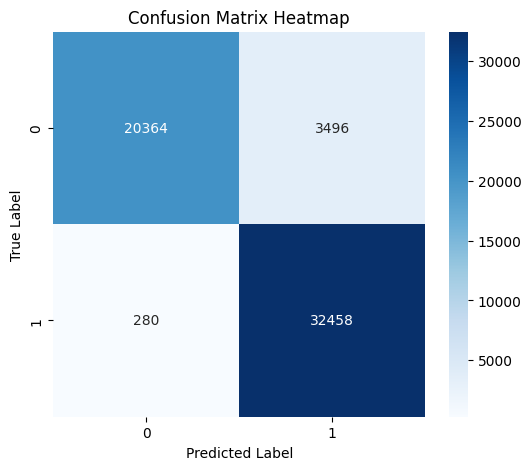

In [479]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = best_model[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)

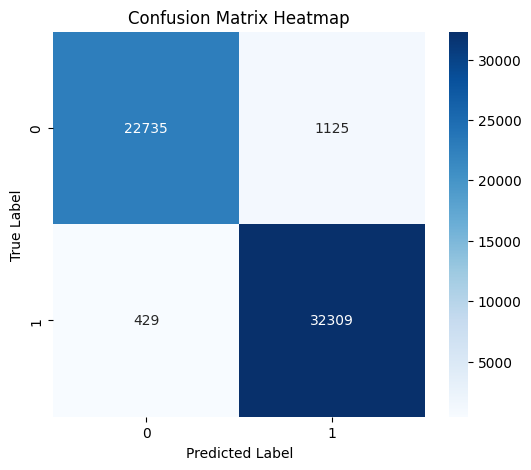

In [480]:
X_test = trainData[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred = best_model2[1].predict(X_test)
plot_confusion_matrix(trainData['Label'], y_pred)

F1-score promedio en validación cruzada: 0.9163 (+/- 0.0028)
F1-score promedio en validación cruzada: 0.9053 (+/- 0.0033)


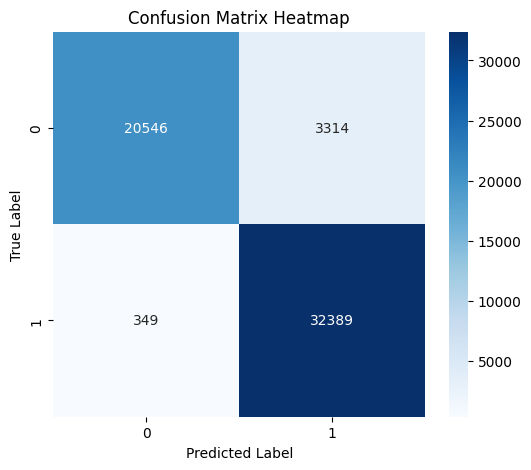

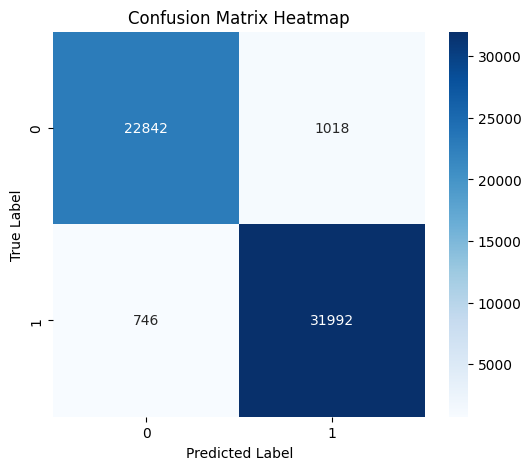

In [513]:
trainDataBest = get_good_test_data(
    downsampling_percentage=0.5)

best_model = trainSpecificModel(trainDataBest, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})
best_model2 = trainSpecificModel(
    trainDataBest, {'max_depth': None,
                    'min_samples_split': 10, 'n_estimators': 300})

basicTraining = get_good_test_data()

X_test = basicTraining[['Titulo', 'Descripcion']]
y_pred = best_model[1].predict(X_test)
plot_confusion_matrix(basicTraining['Label'], y_pred)

y_pred = best_model2[1].predict(X_test)
plot_confusion_matrix(basicTraining['Label'], y_pred)

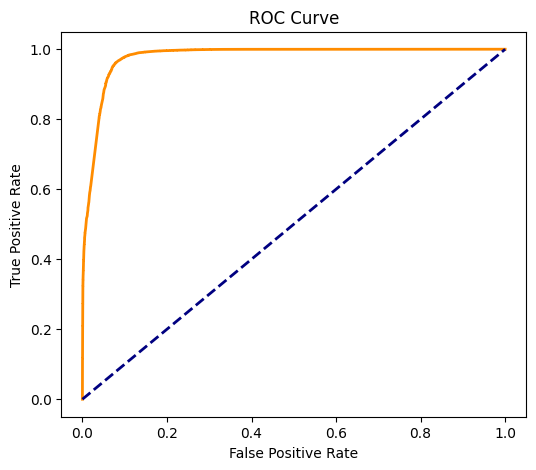

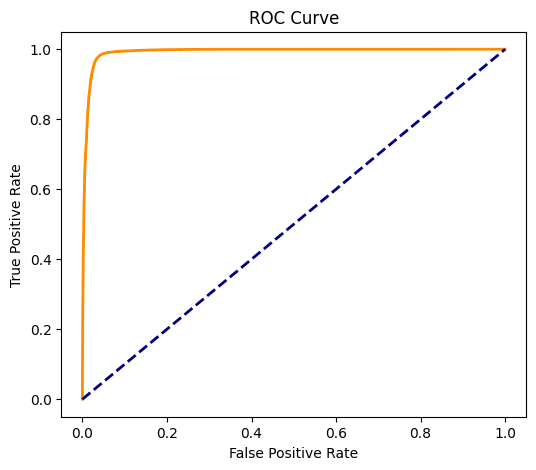

In [514]:

from sklearn.metrics import roc_curve, roc_auc_score


def plot_roc_curve(y_test, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


X_test = trainDataBest[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred_proba = best_model[1].predict_proba(X_test)[:, 1]
plot_roc_curve(trainDataBest['Label'], y_pred_proba)

X_test = trainDataBest[['Titulo', 'Descripcion']]  # Ensure it's a DataFrame
y_pred_proba = best_model2[1].predict_proba(X_test)[:, 1]
plot_roc_curve(trainDataBest['Label'], y_pred_proba)



Respetar español: True, Respetar ASCII: True, Lemmatize: True, Stem: True
F1-score promedio en validación cruzada: 0.9182 (+/- 0.0020)
F1-score promedio en validación cruzada: 0.9068 (+/- 0.0029)


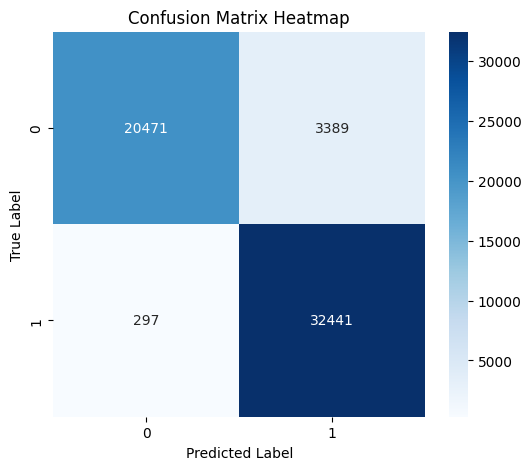

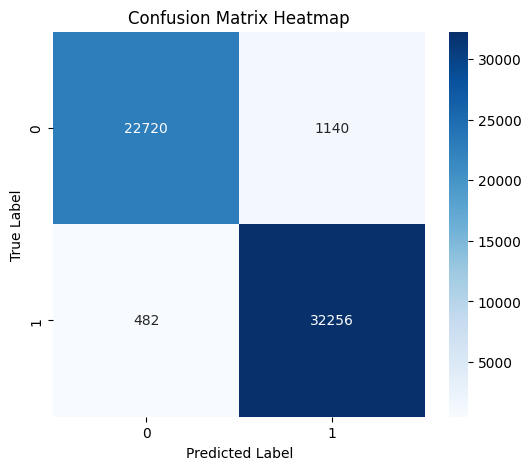



Respetar español: True, Respetar ASCII: True, Lemmatize: True, Stem: False
F1-score promedio en validación cruzada: 0.9173 (+/- 0.0020)
F1-score promedio en validación cruzada: 0.9092 (+/- 0.0029)


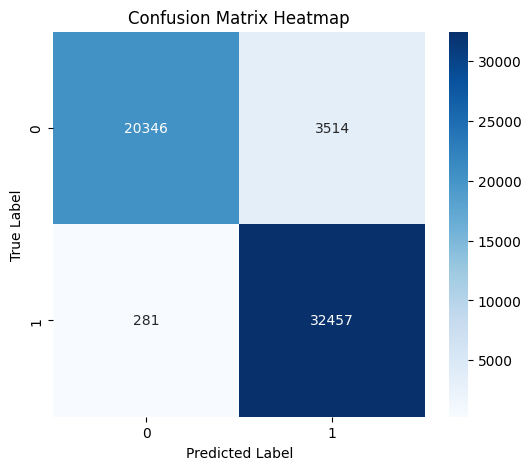

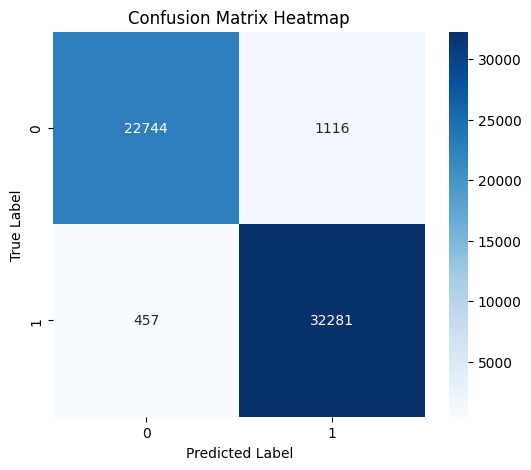



Respetar español: True, Respetar ASCII: True, Lemmatize: False, Stem: True
F1-score promedio en validación cruzada: 0.9176 (+/- 0.0036)
F1-score promedio en validación cruzada: 0.9081 (+/- 0.0028)


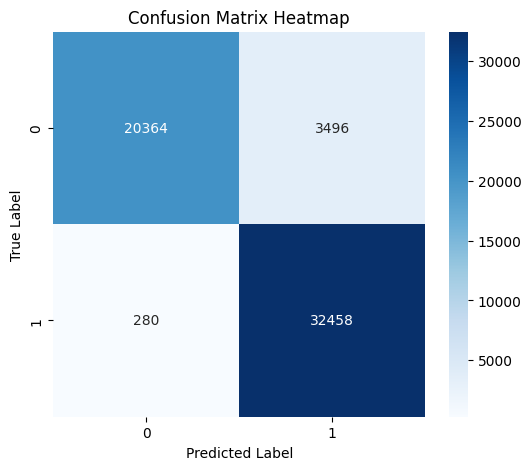

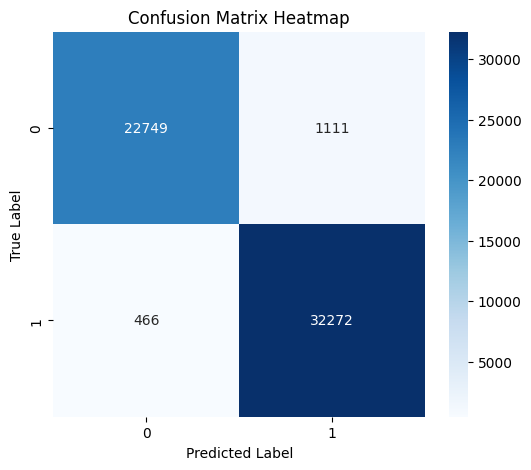



Respetar español: True, Respetar ASCII: True, Lemmatize: False, Stem: False
F1-score promedio en validación cruzada: 0.9176 (+/- 0.0036)
F1-score promedio en validación cruzada: 0.9093 (+/- 0.0035)


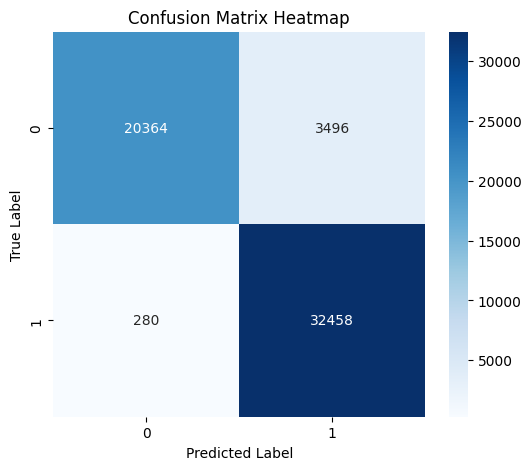

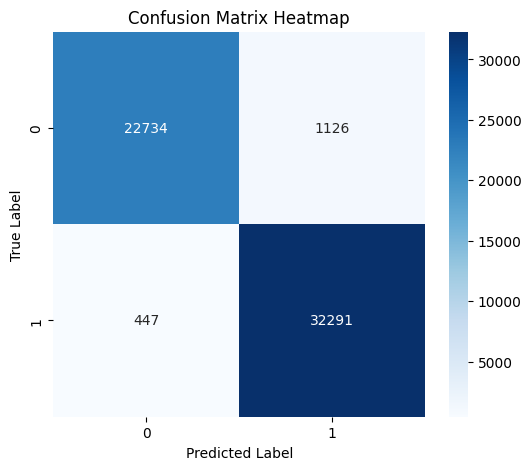



Respetar español: True, Respetar ASCII: False, Lemmatize: True, Stem: True
F1-score promedio en validación cruzada: 0.9180 (+/- 0.0025)
F1-score promedio en validación cruzada: 0.9053 (+/- 0.0021)


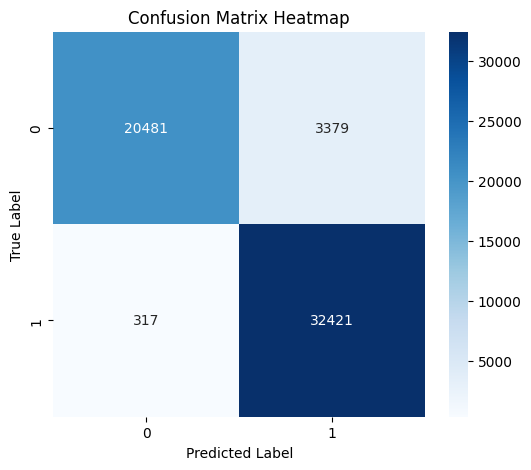

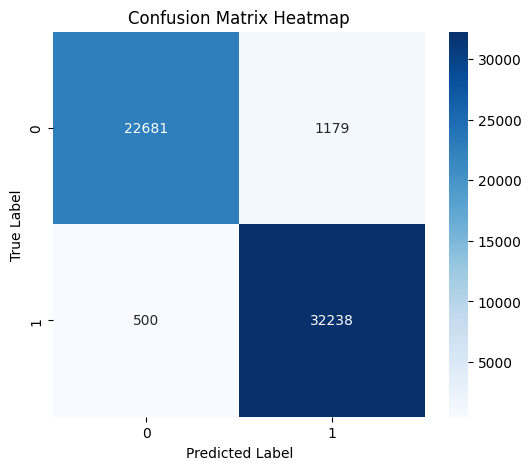



Respetar español: True, Respetar ASCII: False, Lemmatize: True, Stem: False
F1-score promedio en validación cruzada: 0.9183 (+/- 0.0019)
F1-score promedio en validación cruzada: 0.9067 (+/- 0.0025)


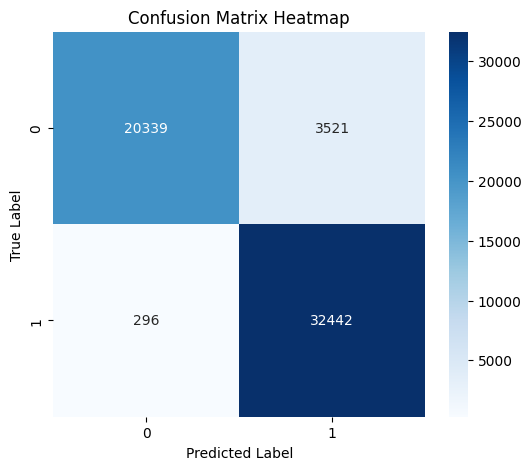

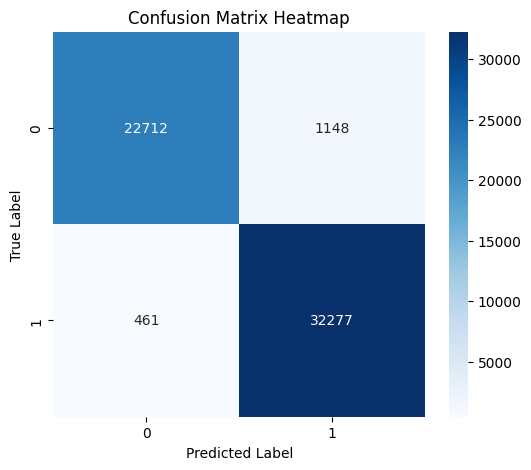



Respetar español: True, Respetar ASCII: False, Lemmatize: False, Stem: True
F1-score promedio en validación cruzada: 0.9180 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9075 (+/- 0.0026)


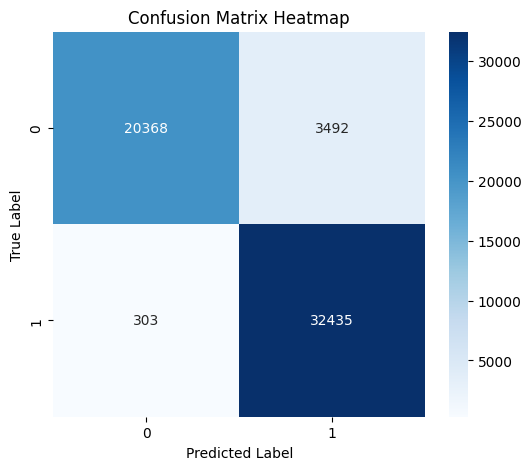

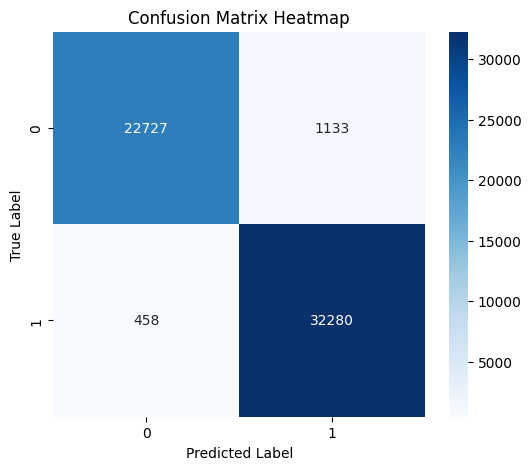



Respetar español: True, Respetar ASCII: False, Lemmatize: False, Stem: False
F1-score promedio en validación cruzada: 0.9180 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9082 (+/- 0.0032)


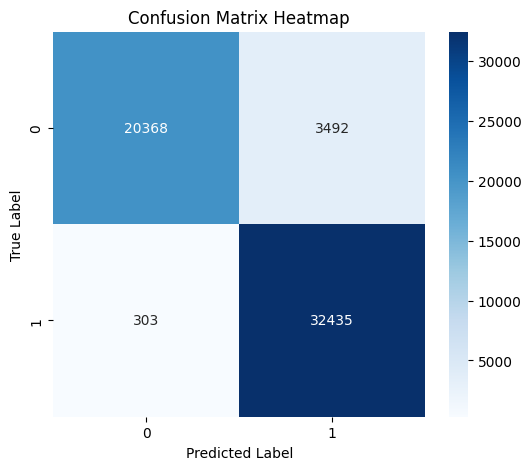

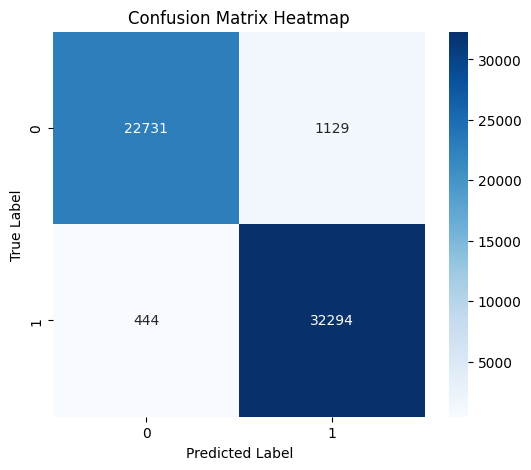



Respetar español: False, Respetar ASCII: True, Lemmatize: True, Stem: True
F1-score promedio en validación cruzada: 0.9189 (+/- 0.0023)
F1-score promedio en validación cruzada: 0.9064 (+/- 0.0024)


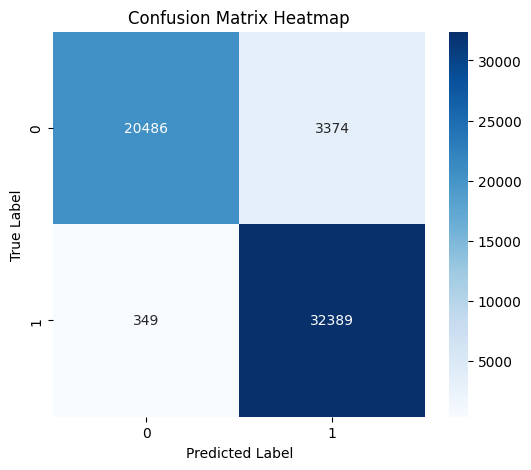

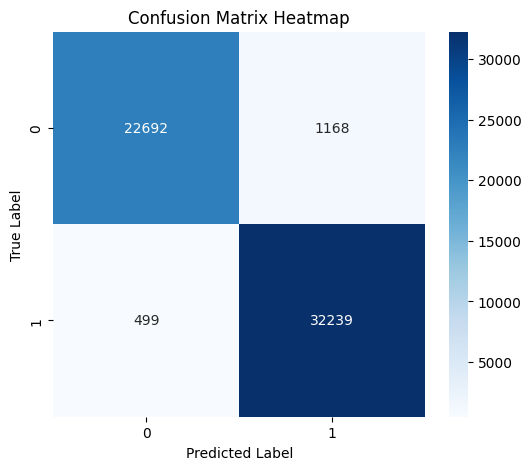



Respetar español: False, Respetar ASCII: True, Lemmatize: True, Stem: False
F1-score promedio en validación cruzada: 0.9184 (+/- 0.0025)
F1-score promedio en validación cruzada: 0.9079 (+/- 0.0026)


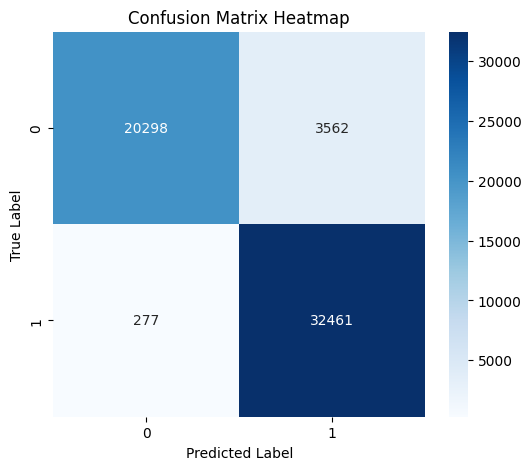

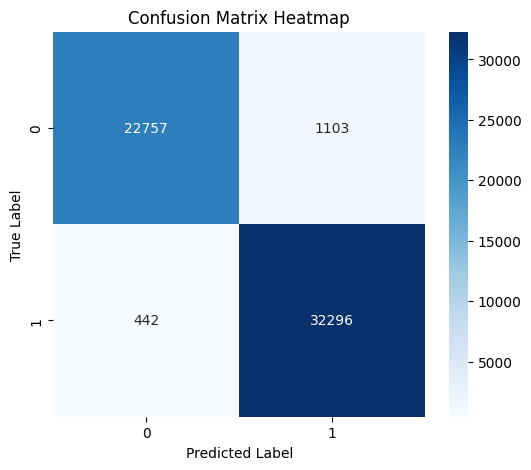



Respetar español: False, Respetar ASCII: True, Lemmatize: False, Stem: True
F1-score promedio en validación cruzada: 0.9179 (+/- 0.0018)
F1-score promedio en validación cruzada: 0.9089 (+/- 0.0028)


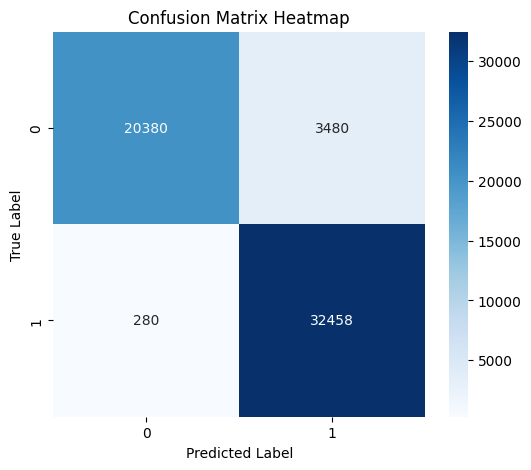

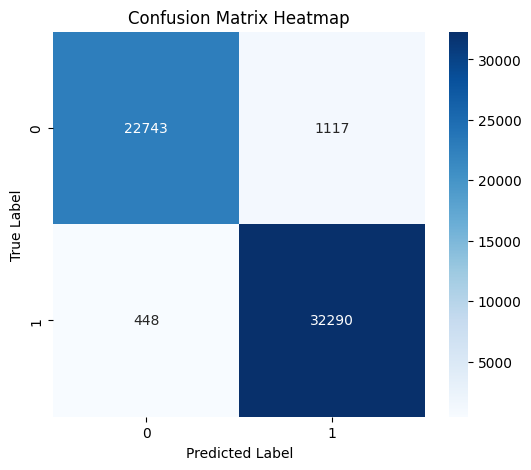



Respetar español: False, Respetar ASCII: True, Lemmatize: False, Stem: False
F1-score promedio en validación cruzada: 0.9179 (+/- 0.0018)
F1-score promedio en validación cruzada: 0.9092 (+/- 0.0022)


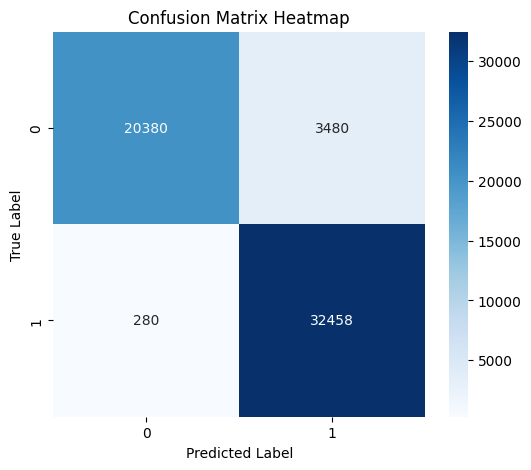

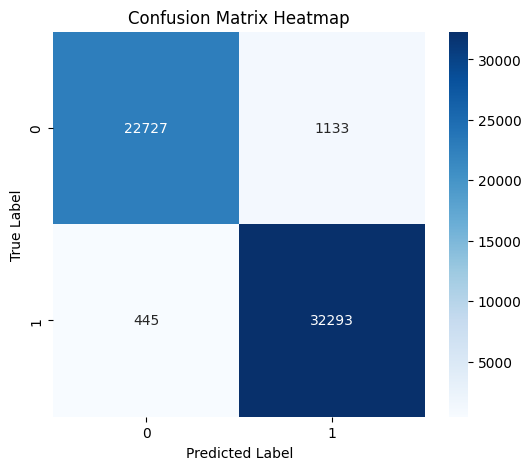



Respetar español: False, Respetar ASCII: False, Lemmatize: True, Stem: True
F1-score promedio en validación cruzada: 0.9180 (+/- 0.0025)
F1-score promedio en validación cruzada: 0.9054 (+/- 0.0020)


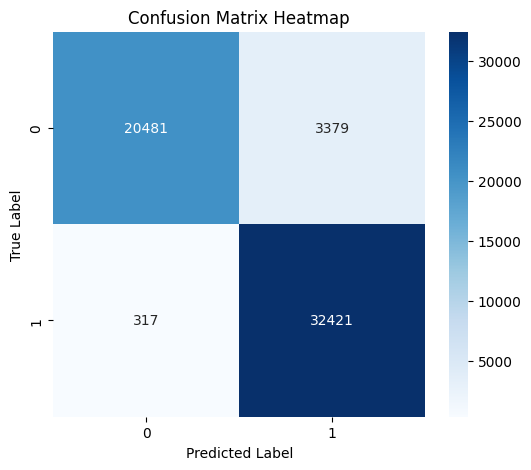

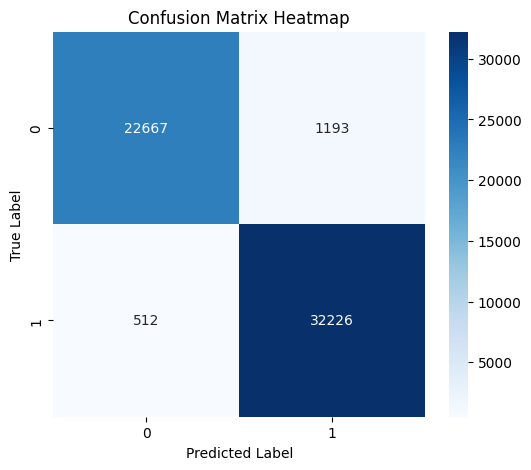



Respetar español: False, Respetar ASCII: False, Lemmatize: True, Stem: False
F1-score promedio en validación cruzada: 0.9183 (+/- 0.0019)
F1-score promedio en validación cruzada: 0.9069 (+/- 0.0034)


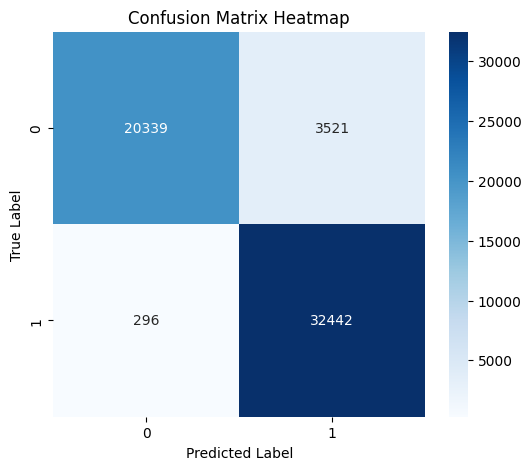

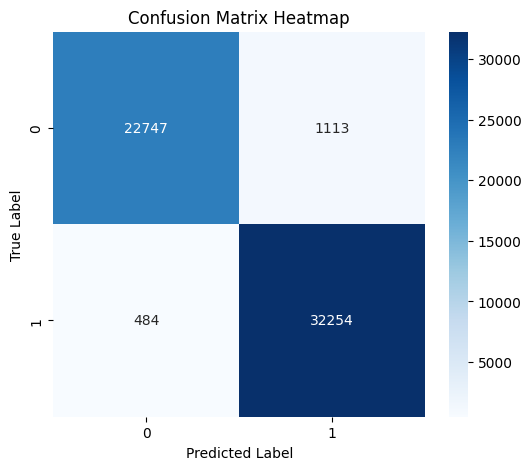



Respetar español: False, Respetar ASCII: False, Lemmatize: False, Stem: True
F1-score promedio en validación cruzada: 0.9180 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9079 (+/- 0.0031)


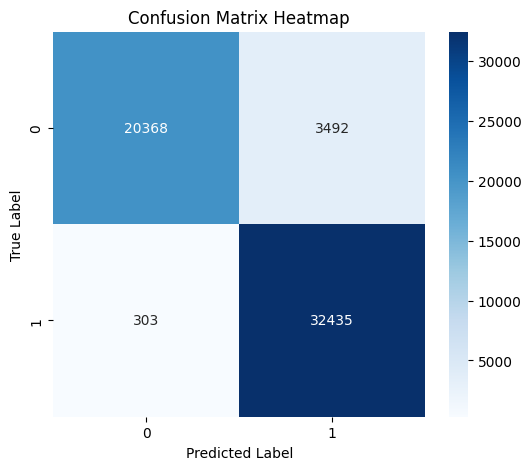

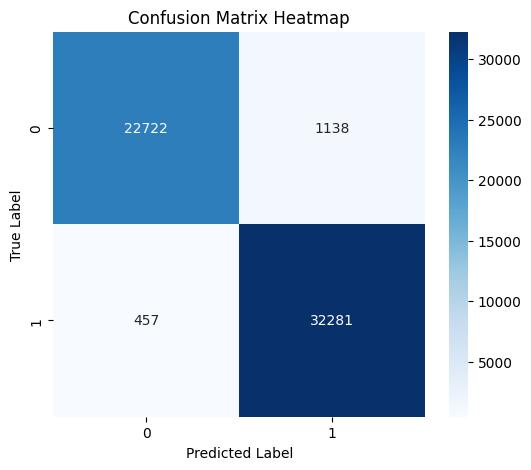



Respetar español: False, Respetar ASCII: False, Lemmatize: False, Stem: False
F1-score promedio en validación cruzada: 0.9180 (+/- 0.0022)
F1-score promedio en validación cruzada: 0.9078 (+/- 0.0023)


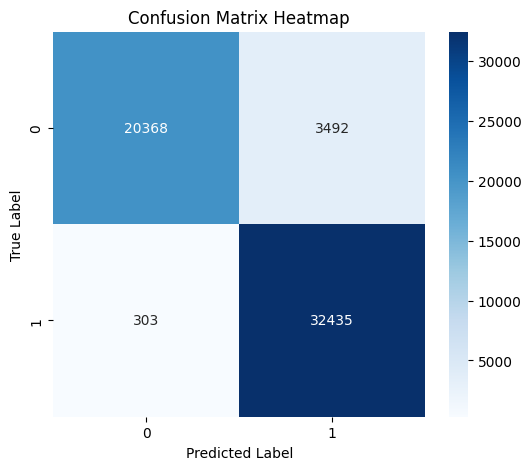

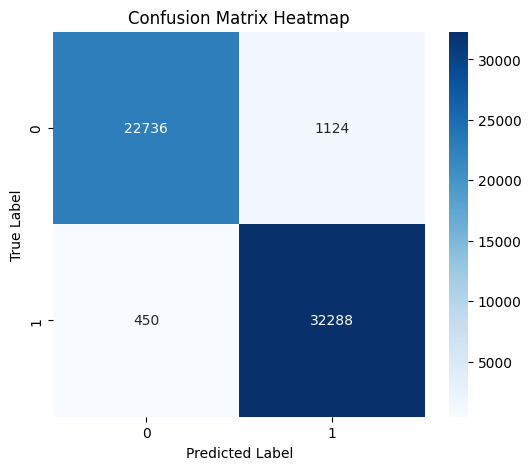

In [481]:
results = {}
for respetar_espanol_param in [True, False]:
    for respetar_ascii_param in [True, False]:
        for lemmatize_param in [True, False]:
            for stem_param in [True, False]:
                print(f"\n\nRespetar español: {respetar_espanol_param}, Respetar ASCII: {respetar_ascii_param}, Lemmatize: {lemmatize_param}, Stem: {stem_param}")
                trainDataExtensive = get_good_test_data(
                    respetar_espanol_param, respetar_ascii_param, lemmatize_param, stem_param)
                columnsForTest = ['Titulo', 'Descripcion']
                confusionMatrixData = trainDataExtensive[columnsForTest]
                best_model = trainSpecificModel(
                    trainDataExtensive, {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2})
                best_model2 = trainSpecificModel(
                    trainDataExtensive, {'max_depth': None,
                                'min_samples_split': 10, 'n_estimators': 300})
                results[(respetar_espanol_param, respetar_ascii_param,
                         lemmatize_param, stem_param)] = (best_model, best_model2)
                try:
                    y_pred = best_model[1].predict(
                        confusionMatrixData)
                    plot_confusion_matrix(trainDataExtensive['Label'], y_pred)
                    y_pred = best_model2[1].predict(
                        confusionMatrixData)
                    plot_confusion_matrix(trainDataExtensive['Label'], y_pred)
                except:
                    print('Error en confusion matrix')
            

In [526]:
trainData = get_good_test_data()
trainData2 = get_good_test_data(downsampling_percentage=0.5)
trainData3 = get_good_test_data(downsampling_percentage=1)
best_model = trainSpecificModel(trainData, {'max_depth': None,
                         'min_samples_split': 10, 'n_estimators': 300})
best_model2 = trainSpecificModel(trainData2, {'max_depth': None,
                         'min_samples_split': 10, 'n_estimators': 300})
best_model3 = trainSpecificModel(trainData3, {'max_depth': None,
                         'min_samples_split': 10, 'n_estimators': 300})

F1-score promedio en validación cruzada: 0.9081 (+/- 0.0026)
F1-score promedio en validación cruzada: 0.9049 (+/- 0.0023)
F1-score promedio en validación cruzada: 0.9086 (+/- 0.0033)


In [528]:
testData = getTestData()
nice_test_data = transfor_data(testData)

In [529]:
for x, i in [(best_model, ''), (best_model2, '1'), (best_model3, '2')]:
    X_test = nice_test_data[['Titulo', 'Descripcion']]
    y_pred = x[1].predict(X_test)
    y_pred_proba = x[1].predict_proba(X_test)[:, 1]

    testData['Label'] = y_pred
    testData['Probabilidad'] = y_pred_proba

    testData.to_csv(f'fake_news_test_predicted{i}.csv', sep=';', index=False)